In [ ]:
import os

# Create the .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Move kaggle.json to the .kaggle directory
!mv /content/kaggle.json ~/.kaggle/

# Set permissions for kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API configured successfully!")

Kaggle API configured successfully!


**Import dataset**

In [ ]:
#configuring the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 65% 106M/163M [00:00<00:00, 1.10GB/s]
100% 163M/163M [00:00<00:00, 886MB/s] 


In [ ]:
#extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


Importing  the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [ ]:
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3093.jpg', 'with_mask_3280.jpg', 'with_mask_1277.jpg', 'with_mask_1500.jpg', 'with_mask_1502.jpg']
['with_mask_1012.jpg', 'with_mask_1873.jpg', 'with_mask_1689.jpg', 'with_mask_482.jpg', 'with_mask_2779.jpg']


In [ ]:
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2849.jpg', 'without_mask_2573.jpg', 'without_mask_1897.jpg', 'without_mask_807.jpg', 'without_mask_1734.jpg']
['without_mask_1132.jpg', 'without_mask_578.jpg', 'without_mask_920.jpg', 'without_mask_1688.jpg', 'without_mask_2337.jpg']


In [ ]:
print('Number of with mask image:', len(with_mask_files))
print('NUmber of without mask image', len(without_mask_files))

Number of with mask image: 3725
NUmber of without mask image 3828


## **Creating Labels for the two class of images**

In [ ]:
# with mask  -> 1
# without mask - > 0

In [ ]:
#create the label
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

In [ ]:
print(len(labels))

7553


**Displaying the image**

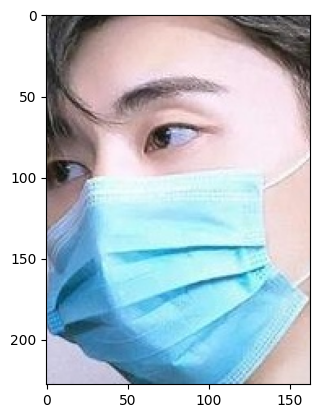

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
implot = plt.imshow(img)
plt.show()

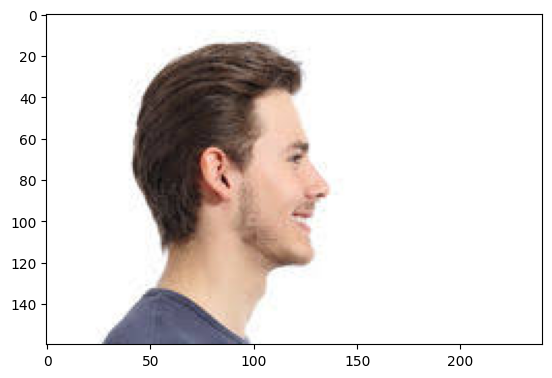

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_2415.jpg')
implot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the images
2. Convert the images to numpy arrays

In [ ]:
with_mask_path = "/content/data/with_mask/"

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(len(data))

7553


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
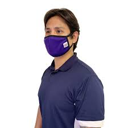

In [ ]:
data[0]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
#converting iage list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2 )

In [ ]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[109, 107, 118],
        [114, 113, 121],
        [111, 106, 116],
        ...,
        [ 90,  97, 107],
        [ 88,  95, 105],
        [ 93,  97, 108]],

       [[110, 108, 118],
        [111, 108, 117],
        [110, 105, 113],
        ...,
        [ 87,  93, 103],
        [ 87,  93, 103],
        [ 89,  93, 104]],

       [[112, 107, 117],
        [113, 109, 117],
        [123, 117, 125],
        ...,
        [ 90,  94, 105],
        [ 92,  95, 106],
        [ 87,  91, 102]],

       ...,

       [[ 46,  66,  91],
        [ 45,  65,  90],
        [ 47,  67,  92],
        ...,
        [176, 143, 123],
        [176, 144, 123],
        [176, 145, 124]],

       [[ 49,  69,  93],
        [ 47,  67,  91],
        [ 46,  66,  90],
        ...,
        [179, 147, 126],
        [178, 146, 125],
        [177, 146, 125]],

       [[ 43,  63,  87],
        [ 43,  63,  87],
        [ 44,  64,  88],
        ...,
        [179, 147, 126],
        [177, 145, 124],
        [175, 144, 124]]], dtype=uint8)
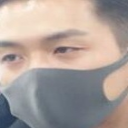

In [ ]:
X_train[0]


In [ ]:
X_train_scaled[0]

array([[[0.42745098, 0.41960784, 0.4627451 ],
        [0.44705882, 0.44313725, 0.4745098 ],
        [0.43529412, 0.41568627, 0.45490196],
        ...,
        [0.35294118, 0.38039216, 0.41960784],
        [0.34509804, 0.37254902, 0.41176471],
        [0.36470588, 0.38039216, 0.42352941]],

       [[0.43137255, 0.42352941, 0.4627451 ],
        [0.43529412, 0.42352941, 0.45882353],
        [0.43137255, 0.41176471, 0.44313725],
        ...,
        [0.34117647, 0.36470588, 0.40392157],
        [0.34117647, 0.36470588, 0.40392157],
        [0.34901961, 0.36470588, 0.40784314]],

       [[0.43921569, 0.41960784, 0.45882353],
        [0.44313725, 0.42745098, 0.45882353],
        [0.48235294, 0.45882353, 0.49019608],
        ...,
        [0.35294118, 0.36862745, 0.41176471],
        [0.36078431, 0.37254902, 0.41568627],
        [0.34117647, 0.35686275, 0.4       ]],

       ...,

       [[0.18039216, 0.25882353, 0.35686275],
        [0.17647059, 0.25490196, 0.35294118],
        [0.18431373, 0

**Building a Convolutional Neural Networks(CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size = (3,3), activation='relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the Neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs=25)

Epoch 1/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - acc: 0.9478 - loss: 0.1384 - val_acc: 0.9174 - val_loss: 0.2617
Epoch 2/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.9450 - loss: 0.1452 - val_acc: 0.9157 - val_loss: 0.2065
Epoch 3/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.9529 - loss: 0.1081 - val_acc: 0.9124 - val_loss: 0.2376
Epoch 4/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9616 - loss: 0.0952 - val_acc: 0.9306 - val_loss: 0.2329
Epoch 5/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9694 - loss: 0.0789 - val_acc: 0.9107 - val_loss: 0.2991
Epoch 6/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.9732 - loss: 0.0798 - val_acc: 0.9157 - val_loss: 0.2917
Epoch 7/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9704 - loss: 0.0829 - val_acc: 0.9223 - val_loss: 0.2873
Epoch 8/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9770 - loss: 0.0724 - val_acc: 0.9388 - val_loss: 0.2633
Epoch 9/25
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9361 - loss: 0.4677
Test Accuracy = 0.9437458515167236


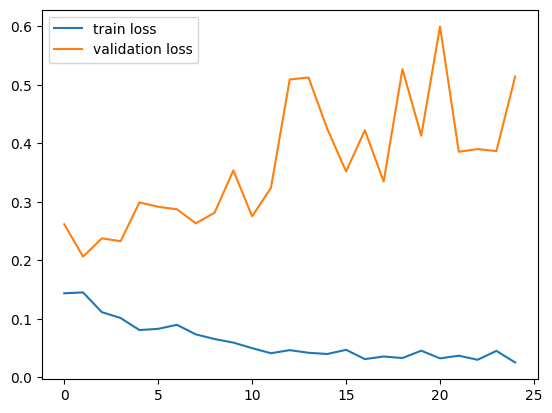

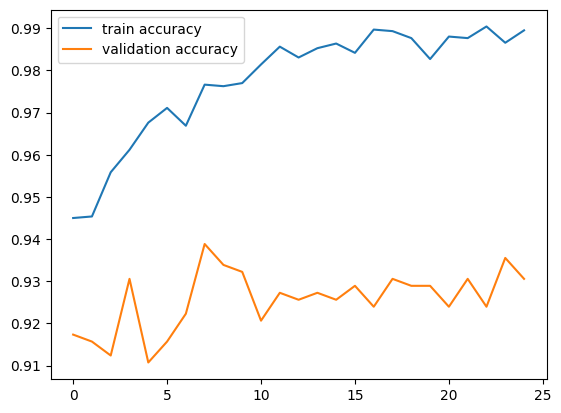

In [ ]:
h = history
#Plot the Loss Value
plt.plot(h.history['loss'],label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#Plot the accuracy Result
plt.plot(h.history['acc'],label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted:/content/how-to-wear-face-mask-right-way.jpg


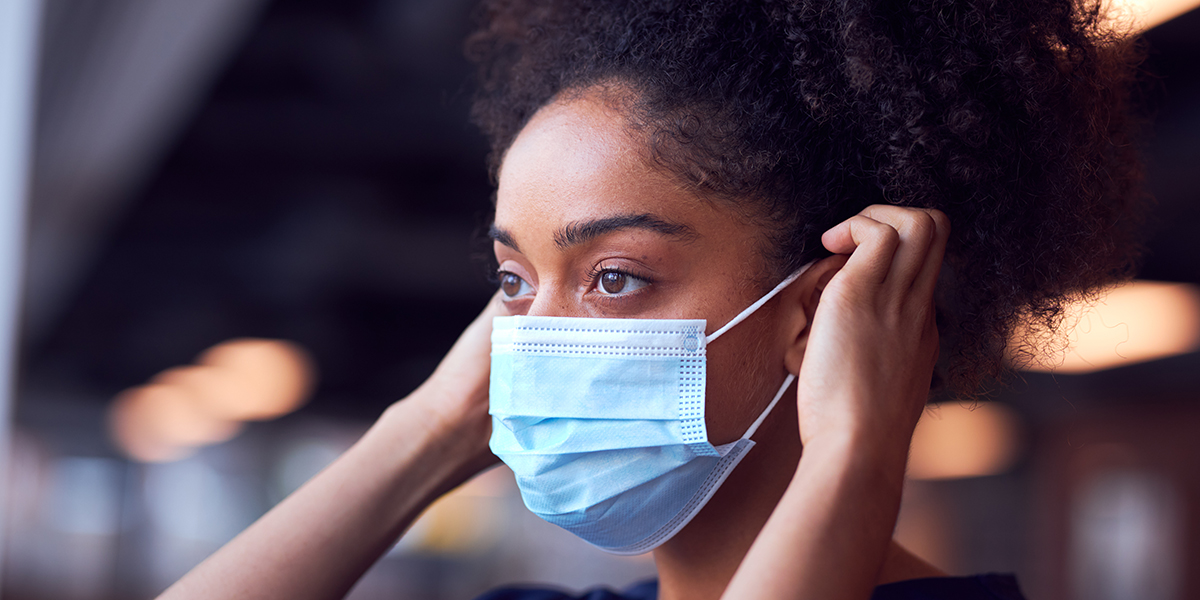

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
[[5.544424e-04 9.980957e-01]]
1
The person in the image is wearing mask


In [ ]:
input_image_path = input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')

Path of the image to be predicted:/content/WhatsApp Image 2023-02-10 at 7.07.05 AM.jpeg


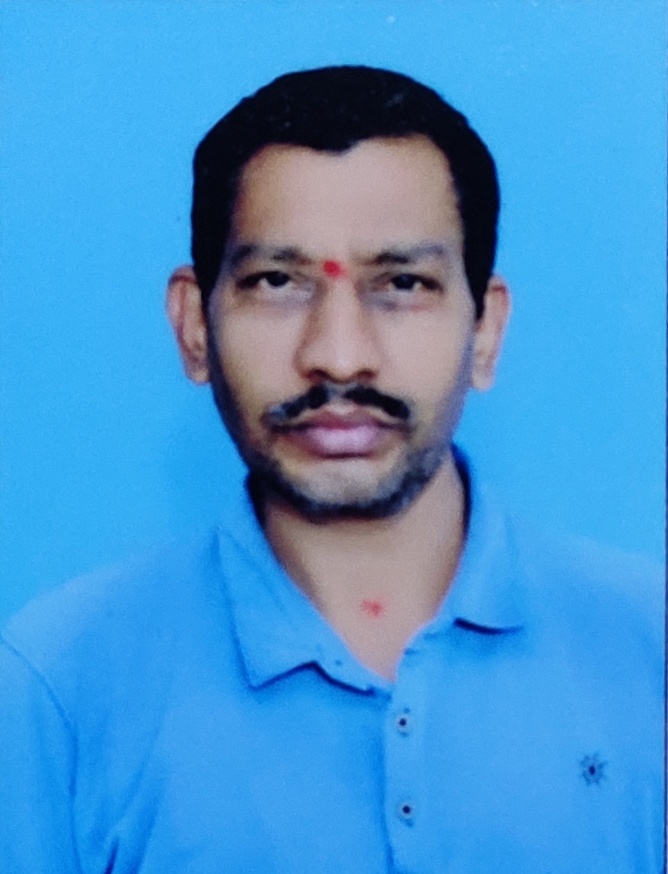

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[0.9817761  0.00473159]]
0
The person in the image is not wearing mask


In [ ]:
input_image_path = input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')